In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display
df = pd.read_csv('pubgdata.csv')

# Data Understanding

In [2]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,6b83d4d45ecf62,e8c092290952d9,9b412e6cc5481e,0,1,507.6,5,1,0,4,...,1,4514.0,0,0.00,0,0,1282.0,10,0,0.5385
1,0e9b6cb7c17211,75f106f54f74d5,e6d147c13957aa,0,0,322.1,0,0,0,11,...,0,0.0,0,0.00,0,0,285.2,2,0,0.3913
2,8e8889b328033c,89f47991688862,e53984a7ff8170,0,5,100.0,0,0,1,23,...,0,0.0,0,93.26,0,0,2264.0,5,1498,0.8469
3,fa0a199936022e,63cb6a32c68aad,04b9f9dc8cedcf,0,1,175.0,1,0,7,19,...,0,0.0,0,0.00,0,0,1363.0,4,0,0.5870
4,d41f0d31978baf,7c0a02fcd55291,561ad0a4f20594,2,3,338.2,0,0,9,22,...,1,0.0,0,0.00,0,0,3945.0,9,1589,0.7907


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444697 entries, 0 to 444696
Data columns (total 29 columns):
Id                 444697 non-null object
groupId            444697 non-null object
matchId            444697 non-null object
assists            444697 non-null int64
boosts             444697 non-null int64
damageDealt        444697 non-null float64
DBNOs              444697 non-null int64
headshotKills      444697 non-null int64
heals              444697 non-null int64
killPlace          444697 non-null int64
killPoints         444697 non-null int64
kills              444697 non-null int64
killStreaks        444697 non-null int64
longestKill        444697 non-null float64
matchDuration      444697 non-null int64
matchType          444697 non-null object
maxPlace           444697 non-null int64
numGroups          444697 non-null int64
rankPoints         444697 non-null int64
revives            444697 non-null int64
rideDistance       444697 non-null float64
roadKills         

In [ ]:
#sns.distplot(df["assists"], color="m", label="Skewness : %.2f"%(df["assists"].skew()))

/Users/shelly/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


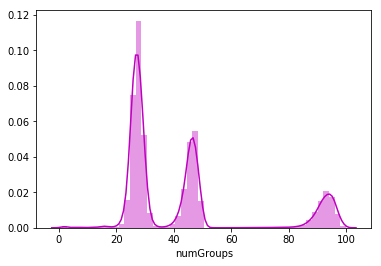

In [34]:
sns.distplot(df["numGroups"], color="m", label="Skewness : %.2f"%(df["numGroups"].skew()))

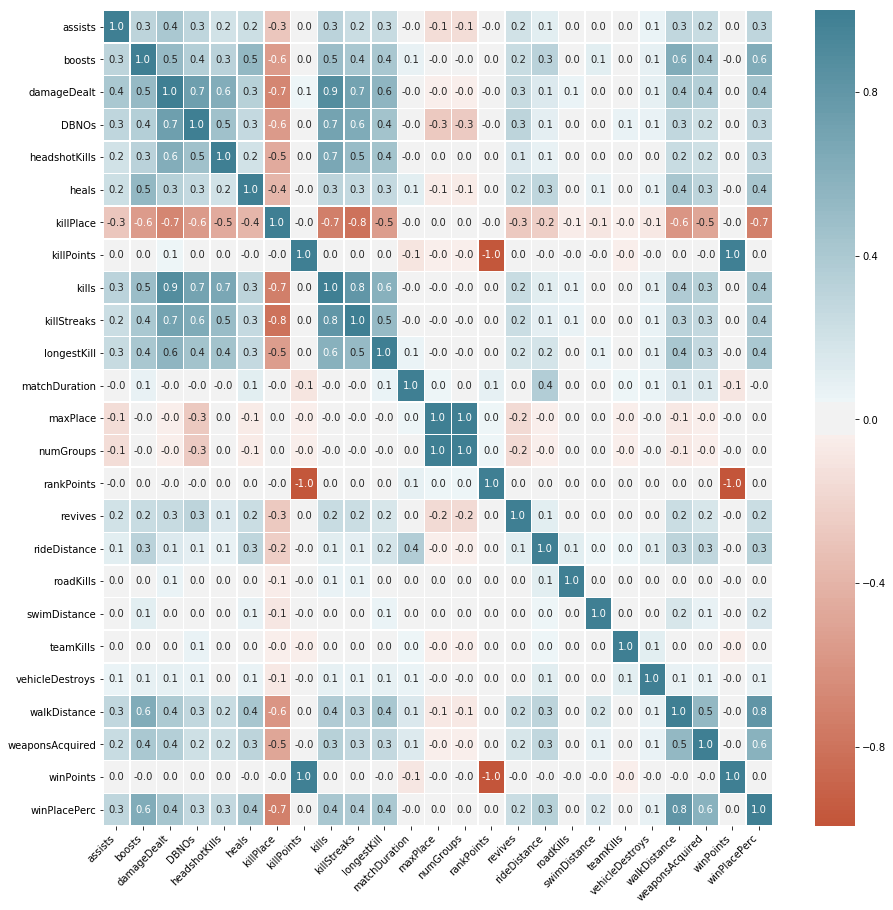

In [4]:
corr = df.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(
    corr,
    annot=True, linewidths=.5, fmt='.1f',
    #vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    ax = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

# Data Preparation - Data Cleaning

In [ ]:
# missing value : none

## Outliers

In [5]:
# outliers:
# killing without moving
df['totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']
# 
df['killsWithoutMoving'] = ((df['kills'] > 0) & (df['totalDistance'] == 0))

In [6]:
display(df[df['killsWithoutMoving'] == True].shape)
df[df['killsWithoutMoving'] == True].head(10)

(146, 31)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving
1922,82acda062c70ef,ef76a17da23a2b,93edb943c25530,4,2,536.4,0,2,2,23,...,0,0.0,0,0,0.0,24,0,0.6667,0.0,True
2807,c1d93e0d4aac70,39705885053c56,d751b4e3fde5bd,1,0,142.6,0,0,0,51,...,0,0.0,0,0,0.0,5,0,0.1538,0.0,True
3167,84e0f115d93b80,5a1c3b3b33d6aa,3d70833b2e48bd,1,0,535.7,0,1,1,13,...,0,0.0,0,0,0.0,17,0,1.0000,0.0,True
6009,e3b805bb54df1d,68ee430fc8915e,76f7e1fca94cb7,3,1,2486.0,0,12,0,1,...,0,0.0,0,0,0.0,37,0,1.0000,0.0,True
8032,01f7c6c2e43d7a,568feb9618dc6e,9982c360bd5d66,1,0,421.7,0,0,0,37,...,0,0.0,0,0,0.0,8,0,0.8571,0.0,True
17917,f74bcc49c5468a,73084a5fedaf7f,eb3217d6db308b,0,0,215.5,0,1,0,26,...,0,0.0,0,0,0.0,10,0,0.6364,0.0,True
18917,89293982cd0cf1,9e4c79923e5ab9,6680c7c3d17d48,1,0,117.8,0,0,0,43,...,0,0.0,0,0,0.0,8,0,0.1429,0.0,True
20409,c6c020716d5764,2b152a7c188077,904cecf36217df,0,0,111.9,0,0,0,36,...,0,0.0,0,0,0.0,10,0,0.7000,0.0,True
20717,6518d658d1dee6,a5f17b3e822cc8,c15c378af9019b,1,0,410.3,0,1,7,37,...,0,0.0,0,0,0.0,20,1500,0.5714,0.0,True
21414,dd98b624fdc920,2adf44dbeb7069,d751b4e3fde5bd,1,0,740.7,0,3,4,3,...,0,0.0,0,0,0.0,13,0,0.8462,0.0,True


In [7]:
# remove outliers
df.drop(df[df['killsWithoutMoving'] == True].index, inplace=True)
df.drop(columns =['totalDistance', 'killsWithoutMoving'])

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,6b83d4d45ecf62,e8c092290952d9,9b412e6cc5481e,0,1,507.60,5,1,0,4,...,1,4514.000,0,0.00,0,0,1282.000,10,0,0.5385
1,0e9b6cb7c17211,75f106f54f74d5,e6d147c13957aa,0,0,322.10,0,0,0,11,...,0,0.000,0,0.00,0,0,285.200,2,0,0.3913
2,8e8889b328033c,89f47991688862,e53984a7ff8170,0,5,100.00,0,0,1,23,...,0,0.000,0,93.26,0,0,2264.000,5,1498,0.8469
3,fa0a199936022e,63cb6a32c68aad,04b9f9dc8cedcf,0,1,175.00,1,0,7,19,...,0,0.000,0,0.00,0,0,1363.000,4,0,0.5870
4,d41f0d31978baf,7c0a02fcd55291,561ad0a4f20594,2,3,338.20,0,0,9,22,...,1,0.000,0,0.00,0,0,3945.000,9,1589,0.7907
5,b637e14c8a692e,837194b93f0350,78166788bf9e47,3,3,110.80,0,0,6,21,...,0,363.200,0,0.00,0,0,2318.000,4,0,0.8929
6,2c959dab1911db,422a3bbaa2704e,192c1ce7f159aa,0,0,25.48,0,0,0,73,...,0,0.000,0,0.00,0,0,74.180,2,0,0.2963
7,f54d89786590e7,fda672c3ba2ab2,f19592568051e2,0,1,136.90,0,0,0,51,...,0,0.000,0,0.00,0,0,2169.000,6,0,0.8298
8,9967cea8119bbf,2ae90e9713553c,c21a7b37f9d657,0,1,21.15,0,0,1,53,...,0,0.000,0,0.00,0,0,696.700,5,0,0.5455
9,6865c7222a3246,f305040b4a4476,e90bc882d5c71b,1,2,263.50,1,0,0,18,...,0,0.000,0,0.00,0,0,447.700,7,1538,0.3462


In [8]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving
0,6b83d4d45ecf62,e8c092290952d9,9b412e6cc5481e,0,1,507.6,5,1,0,4,...,0,0.00,0,0,1282.0,10,0,0.5385,5796.00,False
1,0e9b6cb7c17211,75f106f54f74d5,e6d147c13957aa,0,0,322.1,0,0,0,11,...,0,0.00,0,0,285.2,2,0,0.3913,285.20,False
2,8e8889b328033c,89f47991688862,e53984a7ff8170,0,5,100.0,0,0,1,23,...,0,93.26,0,0,2264.0,5,1498,0.8469,2357.26,False
3,fa0a199936022e,63cb6a32c68aad,04b9f9dc8cedcf,0,1,175.0,1,0,7,19,...,0,0.00,0,0,1363.0,4,0,0.5870,1363.00,False
4,d41f0d31978baf,7c0a02fcd55291,561ad0a4f20594,2,3,338.2,0,0,9,22,...,0,0.00,0,0,3945.0,9,1589,0.7907,3945.00,False


## transformation: target variable

In [9]:
# creat binary class for target variable
def winorloss(row):
    if row['winPlacePerc'] == 1:
        val = 1
    else:
        val = 0
    return val
df['win'] = df.apply(winorloss, axis=1)

In [33]:
df.groupby('win').count()[['Id']]

,Id
win,
0,431747
1,12804


In [10]:
# removed 'killPoints' 'winPoints'
from sklearn.model_selection import train_test_split
X = df.loc[:,['assists', 'boosts', 'damageDealt', 'DBNOs','headshotKills', 'heals', 'killPlace', 'kills','killStreaks', 'longestKill', 'matchDuration','maxPlace','numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills','swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance','weaponsAcquired']].values
y = df['win'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
from sklearn import metrics
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9568284475157012


In [13]:
# feature importance
importance = clf.feature_importances_
features = ['assists', 'boosts', 'damageDealt', 'DBNOs',\
           'headshotKills', 'heals', 'killPlace', 'kills',\
           'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',\
           'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',\
           'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',\
           'weaponsAcquired']

feature_importance = pd.DataFrame({'feature': features, 'importance': importance })
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
6,killPlace,0.152023
20,walkDistance,0.145509
10,matchDuration,0.091467
2,damageDealt,0.080646
9,longestKill,0.069371
13,rankPoints,0.057984
15,rideDistance,0.052673
12,numGroups,0.045772
0,assists,0.043031
5,heals,0.042851


In [14]:
# max_depth = 5
clf1 = tree.DecisionTreeClassifier(max_depth = 5)
clf1 = clf1.fit(X_train, y_train)
print("Accuracy:",metrics.accuracy_score(y_test, clf1.predict(X_test)))

Accuracy: 0.9720527632312981


In [15]:
# max_depth = 
clf2 = tree.DecisionTreeClassifier(max_depth = 4)
clf2 = clf2.fit(X_train, y_train)
print("Accuracy:",metrics.accuracy_score(y_test, clf2.predict(X_test)))

Accuracy: 0.971872806780759


In [16]:
# max_depth = 
clf3 = tree.DecisionTreeClassifier(max_depth = 6)
clf3 = clf3.fit(X_train, y_train)
print("Accuracy:",metrics.accuracy_score(y_test, clf3.predict(X_test)))

Accuracy: 0.9718908024258129


In [32]:
# max_depth = 
clf4 = tree.DecisionTreeClassifier(max_depth = 9)
clf4 = clf4.fit(X_train, y_train)
print("Accuracy:",metrics.accuracy_score(y_test, clf4.predict(X_test)))
print(classification_report(y_test, clf4.predict(X_test))) 

Accuracy: 0.9714409112994655
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    107974
           1       0.49      0.14      0.22      3164

   micro avg       0.97      0.97      0.97    111138
   macro avg       0.73      0.57      0.60    111138
weighted avg       0.96      0.97      0.96    111138



In [17]:
# feature importance
importance = clf1.feature_importances_
features = ['assists', 'boosts', 'damageDealt', 'DBNOs',\
           'headshotKills', 'heals', 'killPlace', 'kills',\
           'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',\
           'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',\
           'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',\
           'weaponsAcquired']

feature_importance = pd.DataFrame({'feature': features, 'importance': importance })
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
6,killPlace,0.533866
20,walkDistance,0.263743
0,assists,0.138751
12,numGroups,0.029066
15,rideDistance,0.010341
1,boosts,0.009521
11,maxPlace,0.004334
5,heals,0.004159
7,kills,0.004112
10,matchDuration,0.002107


In [23]:
import graphviz
X_names = ['assists', 'boosts', 'damageDealt', 'DBNOs',\
           'headshotKills', 'heals', 'killPlace', 'kills',\
           'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',\
           'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',\
           'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',\
           'weaponsAcquired']
Y_names = ['lose', 'win']
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X_names,class_names=Y_names,filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("pubg") 

'pubg.pdf'

In [24]:

dot_data = tree.export_graphviz(clf1, out_file=None, feature_names=X_names,class_names=Y_names,filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("pubg5") 

'pubg5.pdf'

In [20]:
from sklearn.model_selection import cross_val_score
clf0 = tree.DecisionTreeClassifier()
scores = cross_val_score(clf0, X, y, cv=5)
scores                                              

array([0.95685573, 0.95730562, 0.95711394, 0.95700146, 0.95680977])

In [21]:
from sklearn.model_selection import cross_val_score
clf0 = tree.DecisionTreeClassifier(max_depth = 5)
scores = cross_val_score(clf0, X, y, cv=5)
scores

array([0.97113968, 0.97134213, 0.97178045, 0.97184794, 0.97188136])

In [28]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,clf1.predict(X_test)))  
print(classification_report(y_test, clf1.predict(X_test)))  

[[107752    222]
 [  2884    280]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    107974
           1       0.56      0.09      0.15      3164

   micro avg       0.97      0.97      0.97    111138
   macro avg       0.77      0.54      0.57    111138
weighted avg       0.96      0.97      0.96    111138

